## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units,
                             activation='softmax',
                             name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

## 1.試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b_size in BATCH_SIZE:
    keras.backend.clear_session()
    print('Exp with Batch_size : {}'.format(b_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=b_size,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = 'Exp_Batch_size : {}'.format(b_size)
    results[name_tag] = {'train-loss' : train_loss,
                         'valid-loss' : valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Exp with Batch_size : 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None,

Epoch 46/50
50000/50000 [==============================] - 339s 7ms/step - loss: 2.2767 - accuracy: 0.1407 - val_loss: 27.1778 - val_accuracy: 0.1590
Epoch 47/50
50000/50000 [==============================] - 336s 7ms/step - loss: 2.2795 - accuracy: 0.1335 - val_loss: 15.6029 - val_accuracy: 0.1680
Epoch 48/50
50000/50000 [==============================] - 337s 7ms/step - loss: 2.2731 - accuracy: 0.1454 - val_loss: 27.2684 - val_accuracy: 0.1477
Epoch 49/50
50000/50000 [==============================] - 336s 7ms/step - loss: 2.2754 - accuracy: 0.1400 - val_loss: 18.6969 - val_accuracy: 0.1502
Epoch 50/50
50000/50000 [==============================] - 337s 7ms/step - loss: 2.2777 - accuracy: 0.1365 - val_loss: 14.7261 - val_accuracy: 0.1331
Exp with Batch_size : 16
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 41/50
50000/50000 [==============================] - 43s 857us/step - loss: 1.1374 - accuracy: 0.5953 - val_loss: 1.3810 - val_accuracy: 0.5180
Epoch 42/50
50000/50000 [==============================] - 43s 858us/step - loss: 1.1286 - accuracy: 0.6006 - val_loss: 1.4013 - val_accuracy: 0.5100
Epoch 43/50
50000/50000 [==============================] - 43s 859us/step - loss: 1.1170 - accuracy: 0.6013 - val_loss: 1.3403 - val_accuracy: 0.5294
Epoch 44/50
50000/50000 [==============================] - 43s 858us/step - loss: 1.1164 - accuracy: 0.6054 - val_loss: 1.3644 - val_accuracy: 0.5298
Epoch 45/50
50000/50000 [==============================] - 43s 858us/step - loss: 1.1217 - accuracy: 0.6023 - val_loss: 1.3532 - val_accuracy: 0.5273
Epoch 46/50
50000/50000 [==============================] - 43s 863us/step - loss: 1.1104 - accuracy: 0.6055 - val_loss: 1.3497 - val_accuracy: 0.5304
Epoch 47/50
50000/50000 [==============================] - 43s 858us/step - loss: 1.1070 - accuracy:

50000/50000 [==============================] - 23s 459us/step - loss: 0.9054 - accuracy: 0.6756 - val_loss: 1.4489 - val_accuracy: 0.5153
Epoch 36/50
50000/50000 [==============================] - 23s 461us/step - loss: 0.8929 - accuracy: 0.6825 - val_loss: 1.5176 - val_accuracy: 0.4987
Epoch 37/50
50000/50000 [==============================] - 23s 461us/step - loss: 0.8809 - accuracy: 0.6847 - val_loss: 1.4762 - val_accuracy: 0.5113
Epoch 38/50
50000/50000 [==============================] - 23s 463us/step - loss: 0.8731 - accuracy: 0.6882 - val_loss: 1.5010 - val_accuracy: 0.5182
Epoch 39/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.8621 - accuracy: 0.6903 - val_loss: 1.5269 - val_accuracy: 0.5102
Epoch 40/50
50000/50000 [==============================] - 24s 470us/step - loss: 0.8535 - accuracy: 0.6970 - val_loss: 1.7463 - val_accuracy: 0.4741
Epoch 41/50
50000/50000 [==============================] - 23s 468us/step - loss: 0.8387 - accuracy: 0.7019 - va

Epoch 30/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.5328 - accuracy: 0.8132 - val_loss: 1.9582 - val_accuracy: 0.4541
Epoch 31/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.5135 - accuracy: 0.8215 - val_loss: 1.9694 - val_accuracy: 0.4576
Epoch 32/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.4923 - accuracy: 0.8309 - val_loss: 2.0548 - val_accuracy: 0.4625
Epoch 33/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.4783 - accuracy: 0.8345 - val_loss: 2.0483 - val_accuracy: 0.4564
Epoch 34/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.4582 - accuracy: 0.8418 - val_loss: 2.0877 - val_accuracy: 0.4599
Epoch 35/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.4449 - accuracy: 0.8457 - val_loss: 2.1965 - val_accuracy: 0.4573
Epoch 36/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.4354 - accuracy: 0.8490

50000/50000 [==============================] - 6s 115us/step - loss: 0.6129 - accuracy: 0.7952 - val_loss: 1.7189 - val_accuracy: 0.4702
Epoch 26/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.5906 - accuracy: 0.8015 - val_loss: 1.7923 - val_accuracy: 0.4655
Epoch 27/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.5606 - accuracy: 0.8148 - val_loss: 1.9949 - val_accuracy: 0.4491
Epoch 28/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5351 - accuracy: 0.8232 - val_loss: 1.8357 - val_accuracy: 0.4725
Epoch 29/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.5125 - accuracy: 0.8327 - val_loss: 1.8415 - val_accuracy: 0.4644
Epoch 30/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.4912 - accuracy: 0.8406 - val_loss: 1.9050 - val_accuracy: 0.4737
Epoch 31/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.4664 - accuracy: 0.8498 - val_loss:

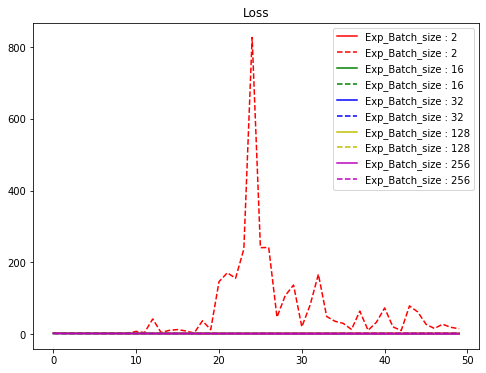

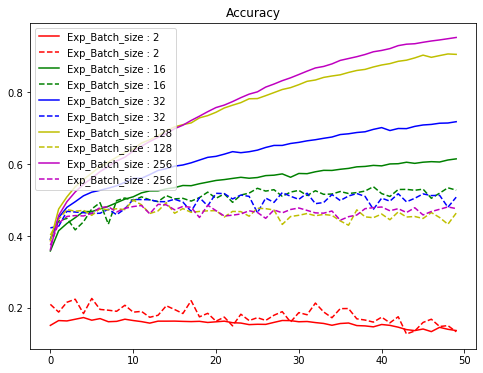

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar=['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

## 2.請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [9]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
    
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units,
                             activation='softmax',
                             name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b_size in BATCH_SIZE:
    keras.backend.clear_session()
    print('Exp with Batch_size : {}'.format(b_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=b_size,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = 'Exp_Batch_size : {}'.format(b_size)
    results[name_tag] = {'train-loss' : train_loss,
                         'valid-loss' : valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Exp with Batch_size : 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None,

50000/50000 [==============================] - 376s 8ms/step - loss: 2.2666 - accuracy: 0.1467 - val_loss: 66180.6170 - val_accuracy: 0.1899
Epoch 45/50
50000/50000 [==============================] - 375s 8ms/step - loss: 2.2641 - accuracy: 0.1483 - val_loss: 69363.6285 - val_accuracy: 0.1461
Epoch 46/50
50000/50000 [==============================] - 374s 7ms/step - loss: 2.2622 - accuracy: 0.1508 - val_loss: 209543.5342 - val_accuracy: 0.1357
Epoch 47/50
50000/50000 [==============================] - 376s 8ms/step - loss: 2.2685 - accuracy: 0.1483 - val_loss: 318.9293 - val_accuracy: 0.1527
Epoch 48/50
50000/50000 [==============================] - 375s 8ms/step - loss: 2.2649 - accuracy: 0.1513 - val_loss: 221.0957 - val_accuracy: 0.1588
Epoch 49/50
50000/50000 [==============================] - 374s 7ms/step - loss: 2.2606 - accuracy: 0.1531 - val_loss: 24.5815 - val_accuracy: 0.1803
Epoch 50/50
50000/50000 [==============================] - 374s 7ms/step - loss: 2.2619 - accuracy: 

50000/50000 [==============================] - 48s 970us/step - loss: 0.7286 - accuracy: 0.7418 - val_loss: 1.3976 - val_accuracy: 0.5550
Epoch 39/50
50000/50000 [==============================] - 48s 967us/step - loss: 0.7277 - accuracy: 0.7444 - val_loss: 1.4100 - val_accuracy: 0.5532
Epoch 40/50
50000/50000 [==============================] - 48s 963us/step - loss: 0.7057 - accuracy: 0.7510 - val_loss: 1.4118 - val_accuracy: 0.5551
Epoch 41/50
50000/50000 [==============================] - 48s 960us/step - loss: 0.6992 - accuracy: 0.7519 - val_loss: 1.4330 - val_accuracy: 0.5460
Epoch 42/50
50000/50000 [==============================] - 48s 963us/step - loss: 0.6949 - accuracy: 0.7561 - val_loss: 1.4425 - val_accuracy: 0.5485
Epoch 43/50
50000/50000 [==============================] - 48s 964us/step - loss: 0.6773 - accuracy: 0.7622 - val_loss: 1.4373 - val_accuracy: 0.5435
Epoch 44/50
50000/50000 [==============================] - 49s 976us/step - loss: 0.6682 - accuracy: 0.7658 - va

Epoch 32/50
50000/50000 [==============================] - 27s 532us/step - loss: 0.4713 - accuracy: 0.8326 - val_loss: 1.6874 - val_accuracy: 0.5351
Epoch 33/50
50000/50000 [==============================] - 28s 550us/step - loss: 0.4637 - accuracy: 0.8352 - val_loss: 1.7309 - val_accuracy: 0.5318
Epoch 34/50
50000/50000 [==============================] - 28s 554us/step - loss: 0.4478 - accuracy: 0.8411 - val_loss: 1.7521 - val_accuracy: 0.5330
Epoch 35/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.4324 - accuracy: 0.8474 - val_loss: 1.7471 - val_accuracy: 0.5370
Epoch 36/50
50000/50000 [==============================] - 28s 560us/step - loss: 0.4259 - accuracy: 0.8494 - val_loss: 1.7588 - val_accuracy: 0.5373
Epoch 37/50
50000/50000 [==============================] - 29s 570us/step - loss: 0.4126 - accuracy: 0.8537 - val_loss: 1.7421 - val_accuracy: 0.5493
Epoch 38/50
50000/50000 [==============================] - 28s 551us/step - loss: 0.4075 - accuracy:

Epoch 26/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.2299 - accuracy: 0.9258 - val_loss: 2.0919 - val_accuracy: 0.5094
Epoch 27/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.2092 - accuracy: 0.9333 - val_loss: 2.1401 - val_accuracy: 0.5060
Epoch 28/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.1971 - accuracy: 0.9366 - val_loss: 2.1781 - val_accuracy: 0.5158
Epoch 29/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.1781 - accuracy: 0.9433 - val_loss: 2.1620 - val_accuracy: 0.5144
Epoch 30/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.1724 - accuracy: 0.9453 - val_loss: 2.2271 - val_accuracy: 0.5092
Epoch 31/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.1541 - accuracy: 0.9523 - val_loss: 2.2999 - val_accuracy: 0.5039
Epoch 32/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.1516 - accuracy:

Epoch 20/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.3746 - accuracy: 0.8908 - val_loss: 1.7621 - val_accuracy: 0.4983
Epoch 21/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.3452 - accuracy: 0.8993 - val_loss: 1.8247 - val_accuracy: 0.4955
Epoch 22/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.3151 - accuracy: 0.9105 - val_loss: 1.8533 - val_accuracy: 0.4992
Epoch 23/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.2804 - accuracy: 0.9217 - val_loss: 1.9072 - val_accuracy: 0.5045
Epoch 24/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.2568 - accuracy: 0.9309 - val_loss: 1.9264 - val_accuracy: 0.5041
Epoch 25/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.2291 - accuracy: 0.9400 - val_loss: 1.9986 - val_accuracy: 0.4991
Epoch 26/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.2114 - accuracy: 0.9447

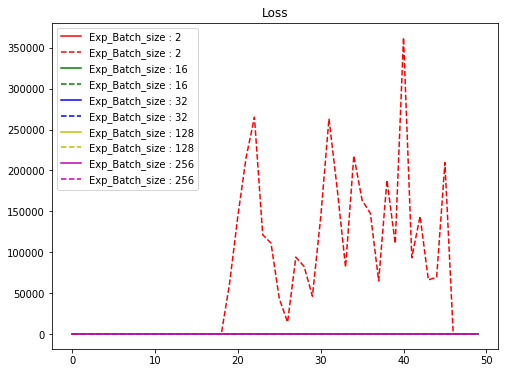

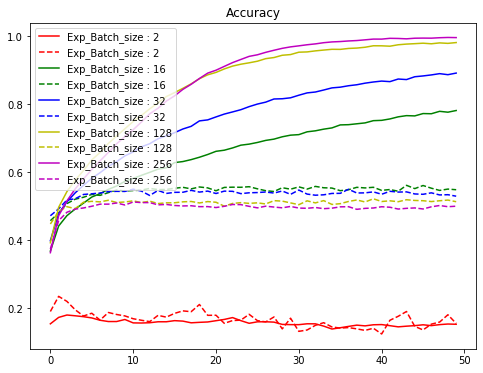

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar=['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

## 3.請於 BN 放在 Input Layer 後，並比較結果

In [19]:
# from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units,
                             activation='softmax',
                             name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b_size in BATCH_SIZE:
    keras.backend.clear_session()
    print('Exp with Batch_size : {}'.format(b_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=b_size,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = 'Exp_Batch_size : {}'.format(b_size)
    results[name_tag] = {'train-loss' : train_loss,
                         'valid-loss' : valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Exp with Batch_size : 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
_____________________

Epoch 48/50
50000/50000 [==============================] - 370s 7ms/step - loss: 1.9240 - accuracy: 0.3160 - val_loss: 1.6727 - val_accuracy: 0.4290
Epoch 49/50
50000/50000 [==============================] - 365s 7ms/step - loss: 1.9257 - accuracy: 0.3150 - val_loss: 1.6435 - val_accuracy: 0.4375
Epoch 50/50
50000/50000 [==============================] - 356s 7ms/step - loss: 1.9237 - accuracy: 0.3180 - val_loss: 1.7385 - val_accuracy: 0.4405
Exp with Batch_size : 16
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________

50000/50000 [==============================] - 47s 940us/step - loss: 0.4424 - accuracy: 0.8449 - val_loss: 2.0493 - val_accuracy: 0.5392
Epoch 45/50
50000/50000 [==============================] - 47s 940us/step - loss: 0.4378 - accuracy: 0.8464 - val_loss: 2.0121 - val_accuracy: 0.5371
Epoch 46/50
50000/50000 [==============================] - 47s 936us/step - loss: 0.4266 - accuracy: 0.8504 - val_loss: 2.0405 - val_accuracy: 0.5440
Epoch 47/50
50000/50000 [==============================] - 49s 977us/step - loss: 0.4174 - accuracy: 0.8542 - val_loss: 2.1102 - val_accuracy: 0.5330
Epoch 48/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.4037 - accuracy: 0.8599 - val_loss: 2.0501 - val_accuracy: 0.5394
Epoch 49/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.4017 - accuracy: 0.8588 - val_loss: 2.0866 - val_accuracy: 0.5330
Epoch 50/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4003 - accuracy: 0.8586 - val_loss

50000/50000 [==============================] - 25s 506us/step - loss: 0.2573 - accuracy: 0.9105 - val_loss: 2.4840 - val_accuracy: 0.5312
Epoch 41/50
50000/50000 [==============================] - 25s 505us/step - loss: 0.2359 - accuracy: 0.9173 - val_loss: 2.5133 - val_accuracy: 0.5304
Epoch 42/50
50000/50000 [==============================] - 25s 505us/step - loss: 0.2411 - accuracy: 0.9165 - val_loss: 2.5923 - val_accuracy: 0.5254
Epoch 43/50
50000/50000 [==============================] - 25s 505us/step - loss: 0.2376 - accuracy: 0.9171 - val_loss: 2.6314 - val_accuracy: 0.5288
Epoch 44/50
50000/50000 [==============================] - 25s 505us/step - loss: 0.2321 - accuracy: 0.9194 - val_loss: 2.6228 - val_accuracy: 0.5281
Epoch 45/50
50000/50000 [==============================] - 25s 509us/step - loss: 0.2350 - accuracy: 0.9171 - val_loss: 2.5923 - val_accuracy: 0.5315
Epoch 46/50
50000/50000 [==============================] - 25s 508us/step - loss: 0.2192 - accuracy: 0.9237 - va

50000/50000 [==============================] - 10s 206us/step - loss: 0.1290 - accuracy: 0.9600 - val_loss: 2.6195 - val_accuracy: 0.5250
Epoch 37/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.1233 - accuracy: 0.9627 - val_loss: 2.6716 - val_accuracy: 0.5220
Epoch 38/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.1195 - accuracy: 0.9621 - val_loss: 2.7246 - val_accuracy: 0.5193
Epoch 39/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.1252 - accuracy: 0.9597 - val_loss: 2.7652 - val_accuracy: 0.5257
Epoch 40/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.1128 - accuracy: 0.9644 - val_loss: 2.7763 - val_accuracy: 0.5218
Epoch 41/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.1146 - accuracy: 0.9639 - val_loss: 2.8992 - val_accuracy: 0.5175
Epoch 42/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.1069 - accuracy: 0.9664 - va

Epoch 33/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.2529 - accuracy: 0.9297 - val_loss: 2.0010 - val_accuracy: 0.5145
Epoch 34/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.2348 - accuracy: 0.9352 - val_loss: 2.0921 - val_accuracy: 0.5110
Epoch 35/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.2169 - accuracy: 0.9420 - val_loss: 2.1062 - val_accuracy: 0.5092
Epoch 36/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.1998 - accuracy: 0.9488 - val_loss: 2.1513 - val_accuracy: 0.5145
Epoch 37/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.1825 - accuracy: 0.9539 - val_loss: 2.1971 - val_accuracy: 0.5154
Epoch 38/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.1695 - accuracy: 0.9580 - val_loss: 2.2542 - val_accuracy: 0.5035
Epoch 39/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.1549 - accuracy: 0.9627

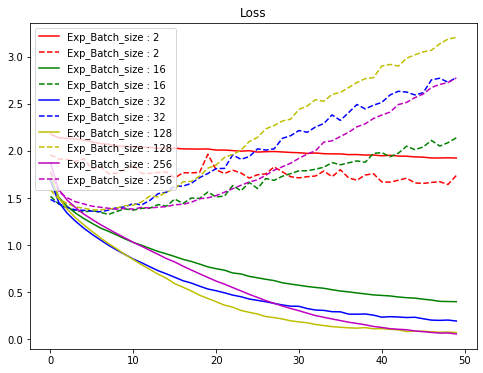

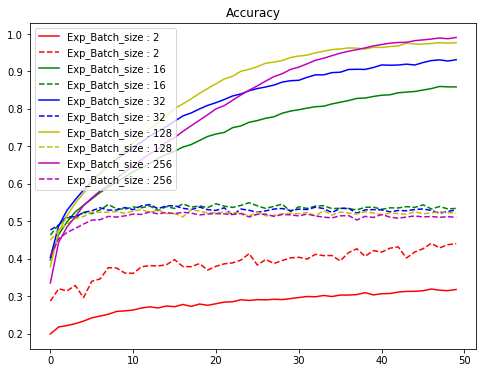

In [21]:
# import matplotlib.pyplot as plt
# %matplotlib inline
"""Code Here
將結果繪出
"""
color_bar=['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()